In [41]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import BSpline
from scipy.signal import savgol_filter

In [42]:
os.chdir('C:\\Projects\\ature\\net_logs')

In [44]:
os.listdir()

['unet-wide.chk.tar.csv']

In [63]:
train_val = pd.read_csv('unet-drive.chk.tar.csv', index_col='TYPE')

val = train_val.query('TYPE==1')
T_val = np.arange(val.shape[0])

train = train_val.query('TYPE==0')
T_train =np.arange(train.shape[0])

test= pd.read_csv('unet-drive.chk.tarTEST.csv', index_col='TYPE')
T_test = np.arange(test.shape[0])

In [64]:
len(prec_hat)

1501

### Validation Precision-Recall

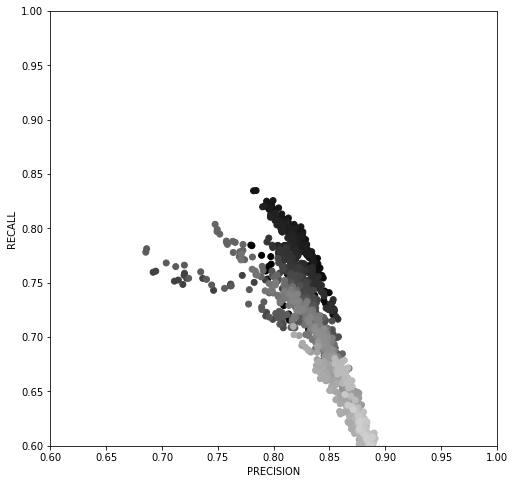

In [65]:
plt.rcParams["figure.figsize"] = [8,8]
prec_hat=savgol_filter(val['PRECISION'], 11, 1)
rec_hat=savgol_filter(val['RECALL'], 11, 1)
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
import itertools
z = np.linspace(0,0.9, len(prec_hat))
y = np.column_stack((z,z,z))
colors = itertools.cycle
plt.scatter(prec_hat, rec_hat, color=y)
plt.xlim((0.6, 1))
plt.ylim((0.6, 1))
plt.show()

### Validation F1 Score

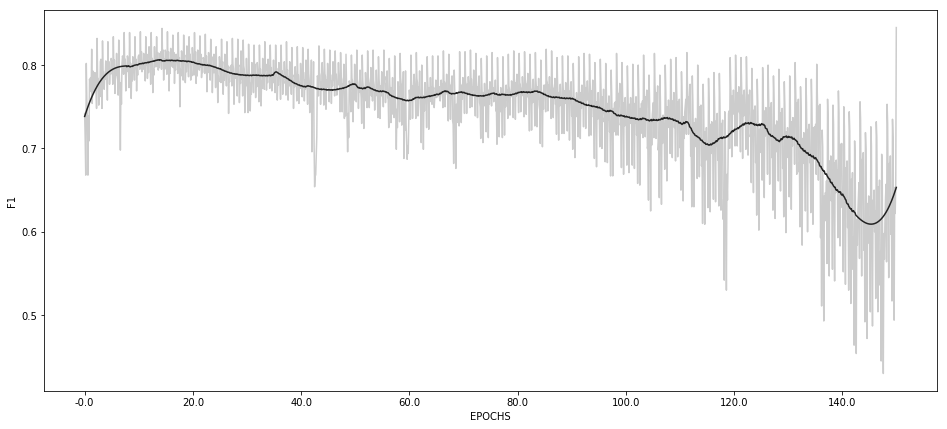

In [66]:
plt.rcParams["figure.figsize"] = [16,7]
f1hat = savgol_filter(val['F1'], 151, 3)
fig, ax = plt.subplots()
fig.canvas.draw()
plt.plot(T_val,val['F1'], color='#cccccc')
plt.plot(T_val,f1hat, color='#222222')
labels = ax.get_xticks()
labels = np.array(labels)//val.query('EPOCH==1').shape[0]
ax.set_xticklabels(labels)
plt.xlabel('EPOCHS')
plt.ylabel('F1')
plt.show()

### Validation Accuracy

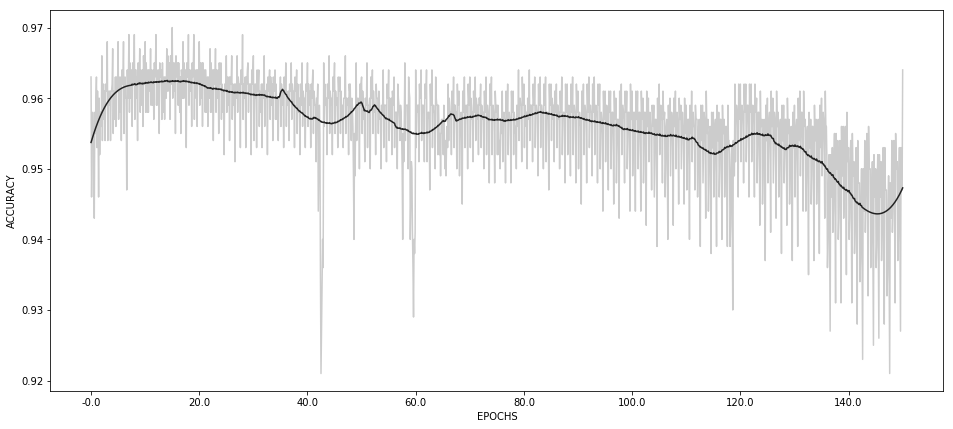

In [67]:
plt.rcParams["figure.figsize"] = [16,7]
f1hat = savgol_filter(val['ACCURACY'], 151, 3)
fig, ax = plt.subplots()
fig.canvas.draw()
plt.plot(T_val,val['ACCURACY'], color='#cccccc')
plt.plot(T_val,f1hat, color='#222222')
labels = ax.get_xticks()
labels = np.array(labels)//val.query('EPOCH==1').shape[0]
ax.set_xticklabels(labels)
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.show()

### Training F1 Score

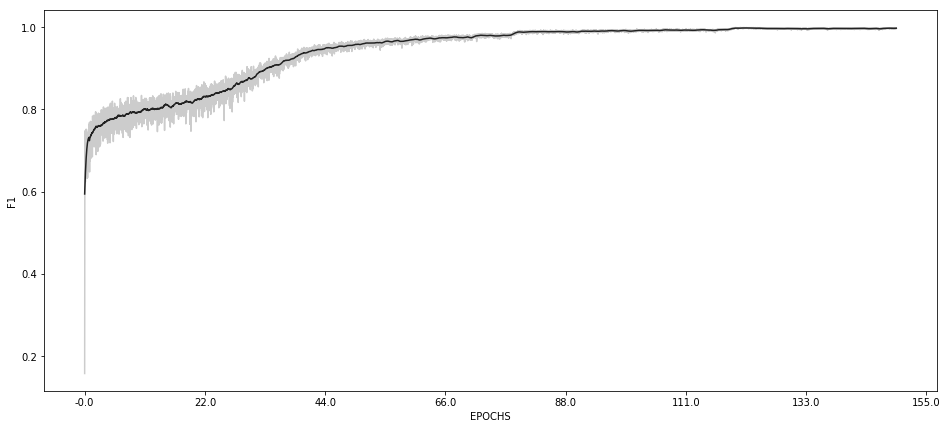

In [68]:
plt.rcParams["figure.figsize"] = [16,7]
f1hat = savgol_filter(train['F1'], 151, 3)
fig, ax = plt.subplots()
fig.canvas.draw()
plt.plot(T_train,train['F1'], color='#cccccc')
plt.plot(T_train,f1hat, color='#222222')
labels = ax.get_xticks()
labels = np.array(labels)//train.query('EPOCH==1').shape[0]
ax.set_xticklabels(labels)
plt.xlabel('EPOCHS')
plt.ylabel('F1')
plt.show()

### Training precision-recall

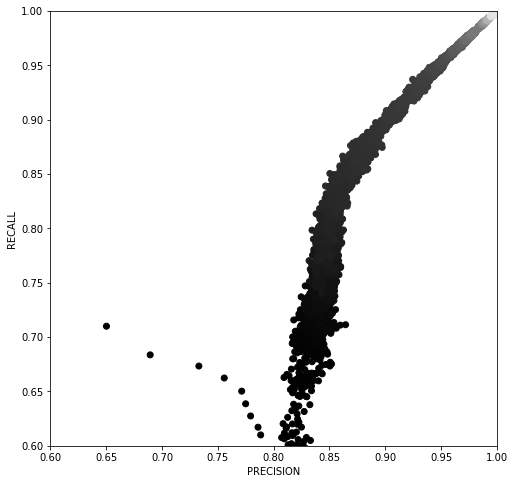

In [69]:
plt.rcParams["figure.figsize"] = [8,8]
prec_hat=savgol_filter(train['PRECISION'], 11, 1)
rec_hat=savgol_filter(train['RECALL'], 11, 1)
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
import itertools
z = np.linspace(0,0.9, len(prec_hat))
y = np.column_stack((z,z,z))
colors = itertools.cycle
plt.scatter(prec_hat, rec_hat, color=y)
plt.xlim((0.6, 1))
plt.ylim((0.6, 1))
plt.show()

### Training loss

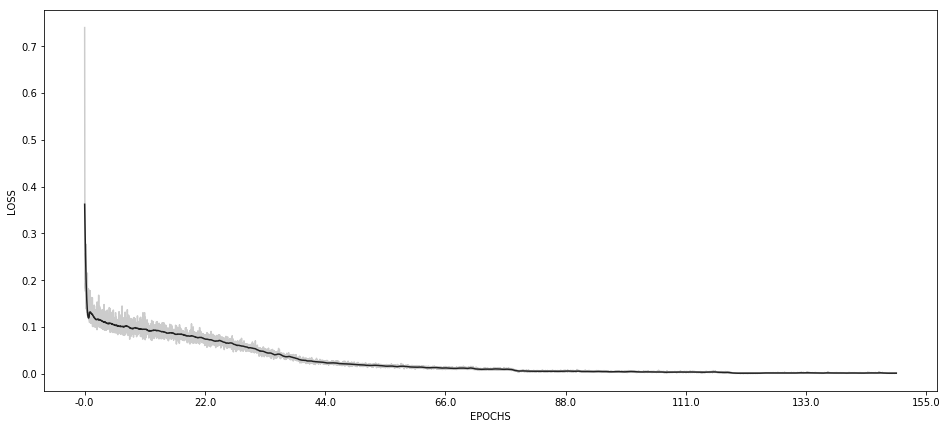

In [70]:
plt.rcParams["figure.figsize"] = [16,7]
f1hat = savgol_filter(train['LOSS'], 151, 3)
fig, ax = plt.subplots()
fig.canvas.draw()
plt.plot(T_train,train['LOSS'], color='#cccccc')
plt.plot(T_train,f1hat, color='#222222')
labels = ax.get_xticks()
labels = np.array(labels)//train.query('EPOCH==1').shape[0]
ax.set_xticklabels(labels)
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.show()

### Training Accuracy

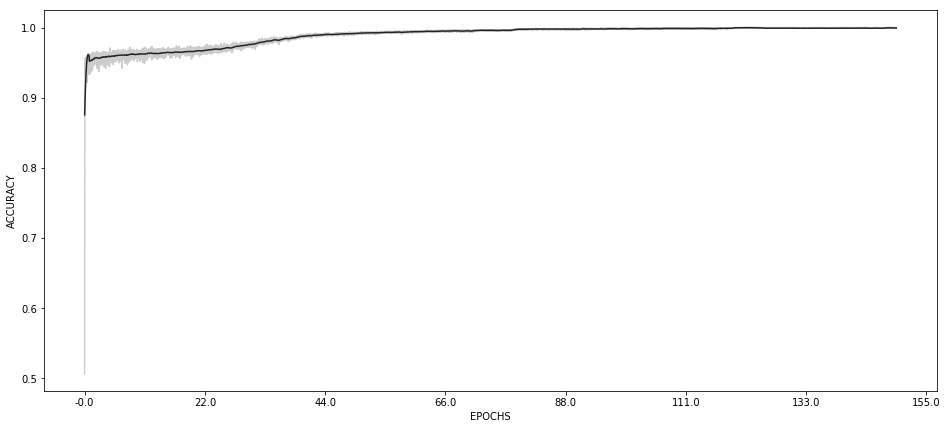

In [71]:
plt.rcParams["figure.figsize"] = [16,7]
f1hat = savgol_filter(train['ACCURACY'], 151, 3)
fig, ax = plt.subplots()
fig.canvas.draw()
plt.plot(T_train,train['ACCURACY'], color='#cccccc')
plt.plot(T_train,f1hat, color='#222222')
labels = ax.get_xticks()
labels = np.array(labels)//train.query('EPOCH==1').shape[0]
ax.set_xticklabels(labels)
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.show()

### TEST F1 Score

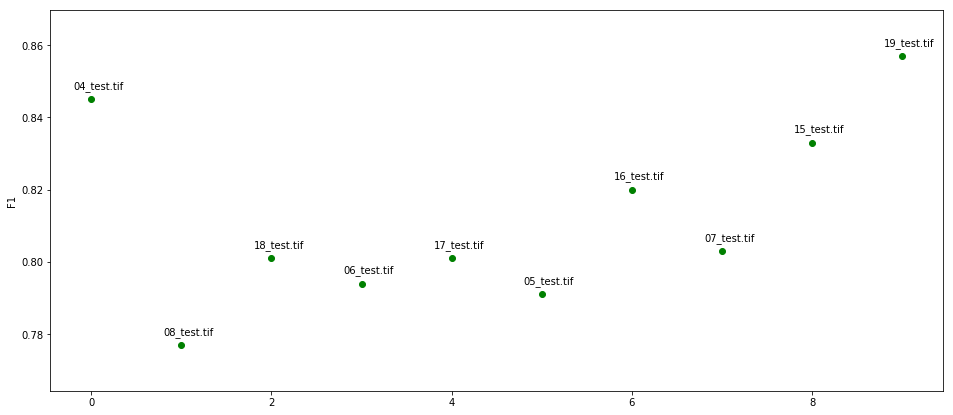

In [170]:
plt.rcParams["figure.figsize"] = [16,7]
fig, ax = plt.subplots()
plt.ylabel('F1')
ax.scatter(T_test, test['F1'], color='green')
for i, txt in enumerate(test['ID']):
    ax.annotate(txt, (T_test[i], test['F1'].iloc[i]), xytext=(T_test[i]-0.2, test['F1'].iloc[i]+0.003))
plt.show()

### TEST precision-recall

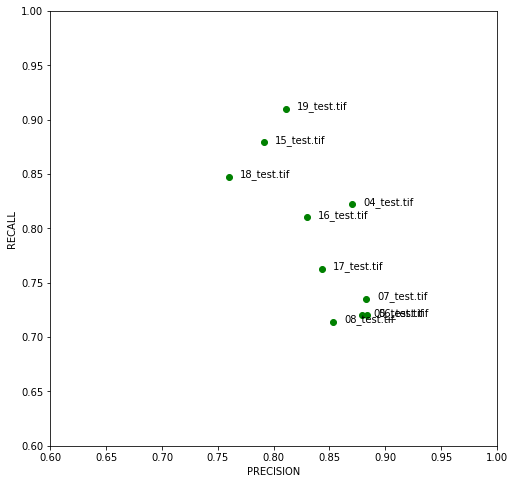

In [177]:
plt.rcParams["figure.figsize"] = [8,8]
fig, ax = plt.subplots()
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.scatter(test['PRECISION'], test['RECALL'], color='green')
for i, txt in enumerate(test['ID']):
    ax.annotate(txt, (test['PRECISION'].iloc[i]+0.01, test['RECALL'].iloc[i]))
plt.xlim((0.6, 1))
plt.ylim((0.6, 1))
plt.show()

### Test Accuracy

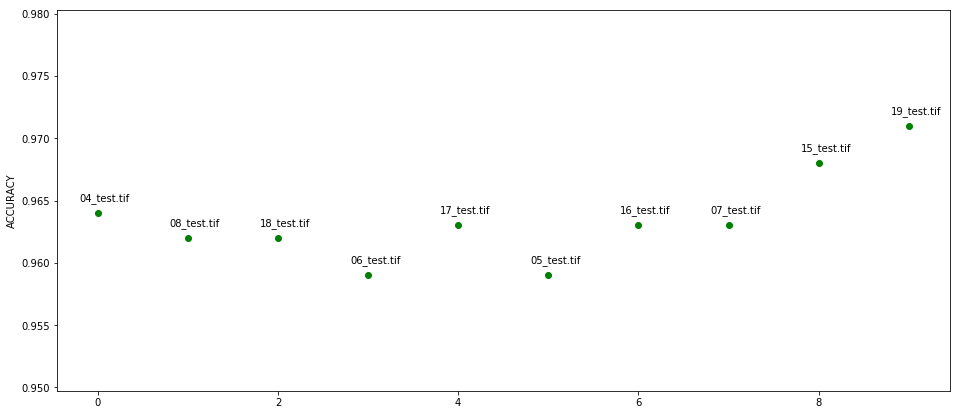

In [169]:
plt.rcParams["figure.figsize"] = [16,7]
fig, ax = plt.subplots()
plt.ylabel('ACCURACY')
ax.scatter(T_test, test['ACCURACY'], color='green')
for i, txt in enumerate(test['ID']):
    ax.annotate(txt, (T_test[i], test['ACCURACY'].iloc[i]), xytext=(T_test[i]-0.2, test['ACCURACY'].iloc[i]+0.001))
plt.show()

In [2]:
os.getcwd()

'C:\\Projects\\ature\\notebook'

In [5]:
sep = os.sep